**Using Transfer learning feature extraction with data augmentation**

In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False, # remove the dense 
    input_shape = (150,150,3) # reshaping
)

58889256/58889256 [==============================] - 0s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
conv_base.trainable = False

In [7]:
# Use when we are not doing data augmentation
# train_ds = keras.utils.image_dataset_from_directory(
#     directory = '/kaggle/input/dogs-vs-cats/train',
#     image_size = (150,150)
# )
# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = '/kaggle/input/dogs-vs-cats/test',
#     image_size = (150,150)
# )

In [8]:
# Data Augmentation
batch_size = 100
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/dogs-vs-cats/train',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)
validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/dogs-vs-cats/test',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode ='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
# def process(image,label):
#     image = tensorflow.cast(image/255.,tensorflow.float32)
#     return image,label
# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit_generator(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

/tmp/ipykernel_26/2989876013.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
200/200 [==============================] - 343s 2s/step - loss: 0.4206 - accuracy: 0.8142 - val_loss: 0.3031 - val_accuracy: 0.8650
Epoch 2/10
200/200 [==============================] - 160s 802ms/step - loss: 0.3302 - accuracy: 0.8529 - val_loss: 0.2907 - val_accuracy: 0.8790
Epoch 3/10
200/200 [==============================] - 160s 799ms/step - loss: 0.3027 - accuracy: 0.8661 - val_loss: 0.2737 - val_accuracy: 0.8810
Epoch 4/10
200/200 [==============================] - 160s 801ms/step - loss: 0.2860 - accuracy: 0.8762 - val_loss: 0.2874 - val_accuracy: 0.8722
Epoch 5/10
200/200 [==============================] - 160s 799ms/step - loss: 0.2753 - accuracy: 0.8802 - val_loss: 0.2657 - val_accuracy: 0.8866
Epoch 6/10
200/200 [==============================] - 160s 801ms/step - loss: 0.2607 - accuracy: 0.8859 - val_loss: 0.2617 - val_accuracy: 0.8894
Epoch 7/10
200/200 [==============================] - 162s 807ms/step - loss: 0.2456 - accuracy: 0.8958 - val_loss: 0.2667 - va

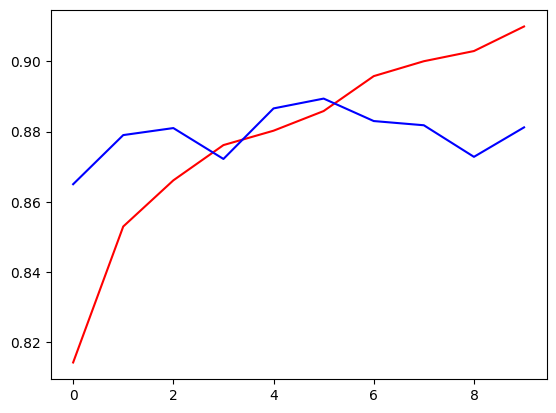

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')

In [13]:
print('accuracy: ',history.history['accuracy'][9])
print('val_accuracy: ',history.history['val_accuracy'][9])

accuracy:  0.9099500179290771
val_accuracy:  0.8812000155448914
